In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('drug.csv')

print(" Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")
print(df.head())

 Dataset loaded successfully!
Shape: (200, 6)
Columns: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'] 

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [5]:
print("\nMissing values in dataset:\n", df.isnull().sum(), "\n")

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Categorical columns encoded.\n")


Missing values in dataset:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64 

Categorical columns encoded.



In [6]:
if 'Drug' in df.columns:
    X = df.drop('Drug', axis=1)
    y = df['Drug']
else:
    raise ValueError("Target column 'Drug' not found in dataset. Check column names.")

print("Features used for training:", X.columns.tolist())
print("Target variable: Drug\n")

Features used for training: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
Target variable: Drug



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Decision Tree Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



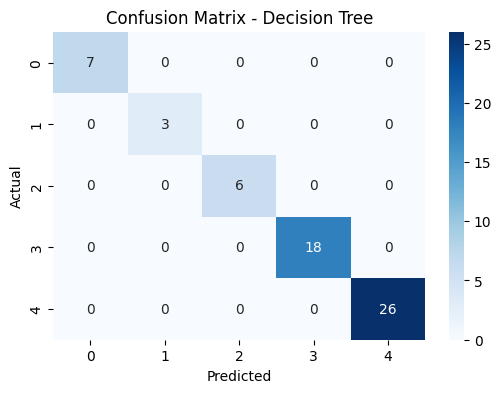

In [9]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

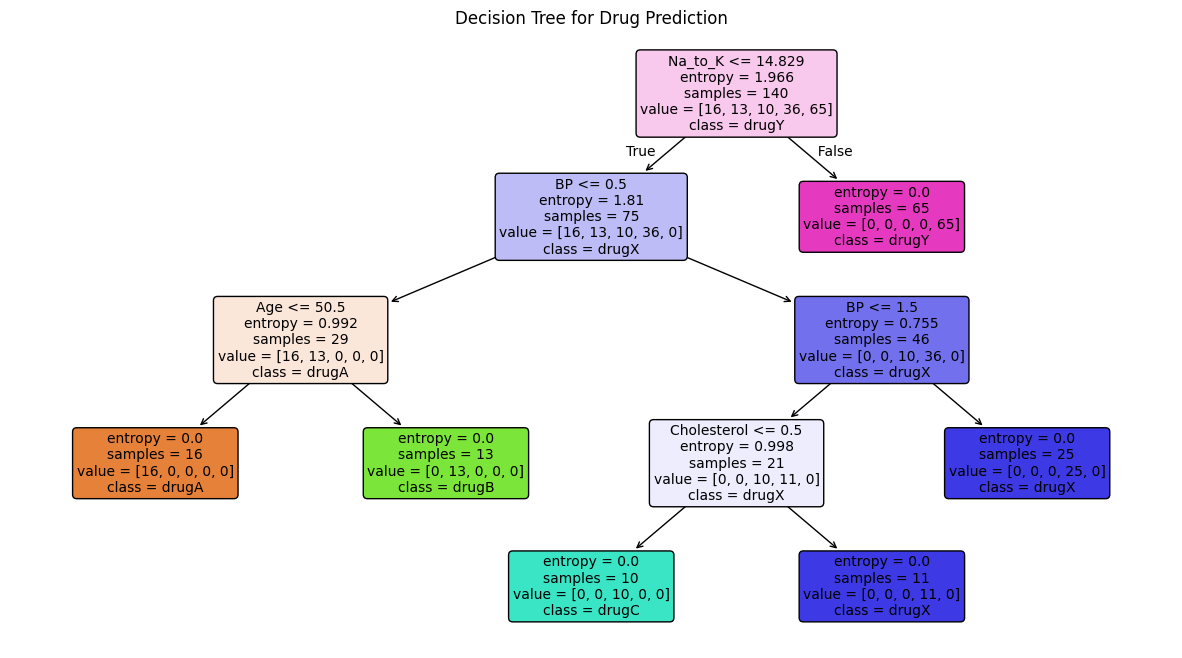

In [10]:
plt.figure(figsize=(15, 8))
plot_tree(dt,
          feature_names=X.columns,
          class_names=[str(c) for c in label_encoders['Drug'].classes_]
          if 'Drug' in label_encoders else None,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Drug Prediction")
plt.show()
